## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('./LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [2]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [3]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [4]:
lj_data.shape

(2760, 13)

### 找到最近更新信息的20套房子

In [7]:
lj_data.sort_values('update_time').head(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2439,良乡租房,良乡中路24号院,国泰百货旁边正规三居室 诚心出租 有钥匙随时看房,3室1厅,68平米,2400,高楼层(共6层),1990年建板楼,南,2017.07.14,0,距离房山线良乡南关站939米 随时看房,https://bj.lianjia.com/zufang/101101799730.html
1683,甘露园租房,康家园,康家园 2室1厅 5000元,2室1厅,65平米,5000,中楼层(共6层),1997年建板楼,南,2017.07.14,25,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101575607.html
1281,东直门租房,华普花园,东二环 东直门 华普花园 出租三居室 看房方便,3室1厅,171平米,20000,中楼层(共22层),2001年建塔楼,南,2017.07.14,3,距离2号线东四十条站323米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101812938.html
1029,草桥租房,恋日花都,恋日花都 南三环 封闭管理小区 开间,1室0厅,54平米,4400,高楼层(共17层),2006年建塔楼,东北,2017.07.14,27,距离10号线草桥站460米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101678256.html
872,朝青租房,天鹅湾北区,天鹅湾北区精致时尚loft 业主婚房诚意出租,1室1厅,46平米,9500,中楼层(共8层),2010年建板塔结合,西,2017.07.14,39,距离6号线青年路站736米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101606488.html
2030,朝青租房,天鹅湾北区,天鹅湾北区 3室2厅 23000元,3室2厅,123平米,23000,高楼层(共18层),2007年建板塔结合,西,2017.07.14,12,距离6号线青年路站481米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101047834.html
142,牡丹园租房,塔院小区,牡丹园西土城地铁北医三院塔院小区南北向两居室,2室1厅,56平米,7500,中楼层(共6层),1988年建板楼,南 北,2017.07.14,42,距离10号线西土城站841米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101667962.html
140,五棵松租房,六建,六建大两居，看房随时，有钥匙。,2室1厅,61平米,5500,低楼层(共16层),1988年建塔楼,南 北,2017.07.14,54,距离1号线五棵松站110米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101663107.html
31,天宁寺租房,白菜湾社区,精装修2居价钱可聊随时拎包入住,2室1厅,59平米,5100,中楼层(共6层),1992年建板楼,南 北,2017.07.14,34,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101749057.html
2562,CBD租房,和乔丽致公寓,CBD白领公寓 和乔经典loft 一居室 拎包入住,1室1厅,61平米,12000,中楼层(共16层),2003年建塔楼,北,2017.07.14,9,距离1号线大望路站703米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101520184.html


### 平均看房人数

In [8]:
lj_data.view_num.mean()

13.44891304347826

### 房龄最小的20套房子的平均看房人数、平均面积...

In [12]:
int(lj_data.loc[0,'build_time'][:4])

1981

In [18]:
import numpy as np

In [75]:
def get_age(x):
    try:
        return 2018 - int(x[:4])
    except:
        return np.NaN

In [76]:
lj_data['build_year'] = lj_data['build_time'].apply(get_age)

### 房子价格的分布(平均，方差，中位数)

In [21]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

### 最受欢迎的朝向(平均看房人数)

In [28]:
lj_data.groupby('direction').mean()['view_num'].sort_values(ascending=False).head(1)

direction
东 东北    34.0
Name: view_num, dtype: float64

### 房型数量分布

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

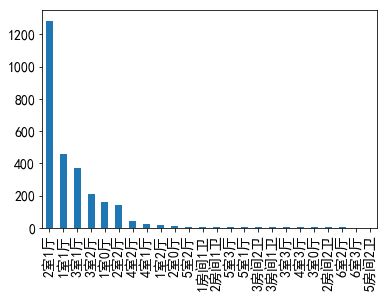

In [39]:
plt.rc('font', family='SimHei', size=14)
lj_data['house_type'].value_counts().plot(kind='bar')

### 最受欢迎的房型

In [41]:
lj_data.groupby('house_type')['view_num'].sum().sort_values(ascending=False).head(1)

house_type
2室1厅    17589
Name: view_num, dtype: int64

### 房子的平均租房价格(按平米算)

In [45]:
import re

In [49]:
re.findall(pattern='(\d+)平米', string='142平米')[0]

'142'

In [52]:
lj_data['area_num'] = lj_data['area'].apply(lambda x: int(x[:-2]))
lj_data.loc[:, 'price_num'] = lj_data['price'] / lj_data['area_num']

### 最受关注的小区

In [60]:
lj_data.groupby('district').view_num.sum().sort_values(ascending=False).head(1)

district
望京租房    1569
Name: view_num, dtype: int64

### 出租房源最多的小区

In [67]:
lj_data['address'].value_counts().head(1)

远洋山水    19
Name: address, dtype: int64

### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [69]:
lj_data['district'].value_counts().head(1)

望京租房    109
Name: district, dtype: int64

### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [72]:
def is_centralwarm(x):
    if x[-4:] == '集中供暖':
        return 1
    else:
        return 0

In [73]:
lj_data['is_cw'] = lj_data['extra_info'].apply(is_centralwarm)

### 哪个城区的租房价格最贵，平均价格是多少

In [83]:
lj_data.groupby('district')['price'].max().sort_values(ascending=False).head(1)

district
和平里租房    210000
Name: price, dtype: int64

### 不同房型的平均/最大/最小面积

In [85]:
lj_data.groupby('house_type')['area_num'].agg(['mean','max','min'])

,mean,max,min
house_type,,,
1室0厅,48.484076,140,19
1室1厅,54.669584,107,28
1室2厅,72.411765,109,45
1房间1卫,42.875000,48,35
2室0厅,49.888889,55,42
2室1厅,78.725857,194,26
2室2厅,106.028169,228,60
2房间1卫,60.166667,67,52
2房间2卫,37.000000,38,36


### 哪个地铁口附近的房子最多

In [114]:
def get_subway_info(pattern, string, n):
    x = re.search(pattern=pattern, string=string)
    if x:
        return x.group(n)
    return ''

In [115]:
lj_data['extra_info'][1]

' 距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖'

In [144]:
lj_data.loc[:, 'station'] = lj_data['extra_info'].apply(lambda x: get_subway_info(r'距离(.+线)(\(.*?段\))?(.+站)', string=x, n=3))

In [139]:
lj_data.loc[:, 'subway_line'] = lj_data['extra_info'].apply(lambda x: get_subway_info(r'距离(.+线)(\(.*?段\))?(.+站)', string=x, n=1))

In [152]:
lj_data['station'].values

array(['', '东湖渠站', '达官营站', ..., '莲花桥站', '', '三元桥站'], dtype=object)

### 地铁附近的房子平均价格 比 非地铁的高多少

In [155]:
lj_data['near_station'] = lj_data['station'].apply(lambda x: x is None)

In [156]:
lj_data.groupby('near_station')['price'].mean()

near_station
False    7570.800725
Name: price, dtype: float64

### 地铁附近的房源离地铁平均距离

In [162]:
lj_data.loc[:, 'distance'] = lj_data['extra_info'].apply(lambda x: get_subway_info(pattern=r'.*站(.*?)米', string=x, n=1))

In [166]:
def distance_trans(x):
    try:
        return int(x)
    except:
        return np.NaN

In [167]:
lj_data['distance'] = lj_data['distance'].apply(distance_trans)

In [168]:
lj_data.distance.mean()

717.5501792114695

### 最多的在租楼层

In [170]:
lj_data['floor_type'] = lj_data['floor'].apply(lambda x:x[0])

In [171]:
lj_data.floor_type.value_counts()

中    1026
高     932
低     798
地       4
Name: floor_type, dtype: int64

### 不同地区的房龄分布

In [181]:
lj_data.groupby('district').build_year.describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
CBD租房,16.0,17.375000,4.937948,14.0,14.00,15.5,18.00,33.0
七里庄租房,17.0,20.529412,6.135121,12.0,17.00,18.0,28.00,31.0
万寿路租房,8.0,29.125000,6.379375,19.0,26.25,30.5,32.50,38.0
万柳租房,24.0,15.083333,1.691839,13.0,14.00,14.0,16.00,18.0
三元桥租房,22.0,19.363636,7.524851,10.0,13.00,16.0,25.75,34.0
三里屯租房,6.0,16.833333,7.521081,9.0,11.25,15.0,23.25,26.0
上地租房,12.0,18.583333,3.058768,15.0,16.00,18.5,20.00,25.0
世纪城租房,16.0,14.500000,2.280351,11.0,14.00,14.0,15.25,18.0
东关租房,15.0,19.733333,8.145697,6.0,14.00,23.0,25.00,34.0


### 直接看房的房子比例

In [189]:
lj_data.loc[:, 'convinent'] = lj_data.extra_info.apply(lambda x: '随时看房' in x)

In [190]:
lj_data.convinent.mean()

0.9985507246376811

### 有电梯和无电梯的房子数量

In [197]:
lj_data['floor_num'] = lj_data.floor.apply(lambda x: get_subway_info(pattern=r'共(.*?)层', string=x, n=1))

In [198]:
def convert_num(x):
    try:
        return int(x)
    except:
        return np.NaN

In [199]:
lj_data['floor_num'] = lj_data.floor_num.apply(convert_num)

In [201]:
lj_data['elevator'] = lj_data['floor_num'].apply(lambda x: 1 if x>6 else 0)

In [203]:
lj_data.elevator.value_counts()

1    1868
0     892
Name: elevator, dtype: int64

### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

In [204]:
lj_data.groupby('elevator').describe()

area_num                                                        \
            count       mean        std   min   25%   50%    75%    max   
elevator                                                                  
0           892.0  76.914798  43.287252  30.0  54.0  63.0   88.0  720.0   
1          1868.0  92.789079  40.175598  19.0  63.0  88.0  109.0  330.0   

         build_year                                                    \
              count       mean       std  min   25%   50%   75%   max   
elevator                                                                
0             888.0  24.263514  9.305557  4.0  18.0  23.0  30.0  62.0   
1            1867.0  14.515801  6.595424  2.0  10.0  13.0  18.0  48.0   

         distance                                                       \
            count        mean        std    min     25%    50%     75%   
elevator                                                                 
0           468.0  756.369658  237.36326  115.0  572.75  782.0  934.50   
1          1206.0  702.485904  278.35670    1.0  494.25  731.0  909.75   

                 floor_num                                                    \
             max     count       mean       std  min   25%   50%   75%   max   
elevator                                                                       
0         1197.0     892.0   5.735426  0.615513  2.0   6.0   6.0   6.0   6.0   
1         1198.0    1868.0  18.898287  6.496205  7.0  14.0  18.0  24.0  42.0   

           is_cw                                                price  \
           count      mean       std  min  25%  50%  75%  max   count   
elevator                                                                
0          892.0  0.862108  0.344980  0.0  1.0  1.0  1.0  1.0   892.0   
1         1868.0  0.811028  0.391591  0.0  1.0  1.0  1.0  1.0  1868.0   

                                                                              \
                 mean          std     min     25%     50%     75%       max   
elevator                                                                       
0         5928.531390  7617.537387  1300.0  3800.0  5000.0  6500.0  210000.0   
1         8355.010707  5418.345946  1950.0  5000.0  6500.0  9500.0   45000.0   

         price_num                                                         \
             count       mean        std        min        25%        50%   
elevator                                                                    
0            892.0  81.754433  36.972805  14.880952  48.863438  81.066176   
1           1868.0  90.572620  34.930558  21.674877  65.000000  88.127203   

                                 view_num                                  \
                 75%         max    count       mean        std  min  25%   
elevator                                                                    
0         110.289710  291.666667    892.0  11.618834  11.550621  0.0  3.0   
1         108.695652  276.315789   1868.0  14.322805  13.192862  0.0  5.0   

                             
           50%   75%    max  
elevator                     
0          8.0  16.0   75.0  
1         11.0  20.0  122.0

### 附加信息里主要有哪几类信息，覆盖多少百分比的房子

In [208]:
lj_data['all_info'] = lj_data.extra_info.apply(lambda x: x.split())

In [211]:
def get_subway_info(x):
    for i in x:
        if '距离' in i:
            return i
        
    return ''

In [217]:
lj_data['subway_info'] = lj_data.all_info.apply(get_subway_info)

In [214]:
def get_conv_info(x):
    for i in x:
        if '看房' in i:
            return i
        
    return ''

In [218]:
lj_data['look_info'] = lj_data.all_info.apply(get_conv_info)

In [216]:
def get_warm_info(x):
    for i in x:
        if '供暖' in i:
            return i
    return ''

In [219]:
lj_data['warm_info'] = lj_data.all_info.apply(get_warm_info)

In [245]:
def get_decorate_info(x):
    for i in x:
        if '装修' in i:
            return i
    return ''

In [246]:
lj_data['decorate_info'] = lj_data.all_info.apply(get_decorate_info)

In [247]:
lj_data['is_subway_info'] = lj_data['subway_info'].apply(lambda x: 0 if x == '' else 1)
lj_data['is_look_info'] = lj_data['look_info'].apply(lambda x: 0 if x == '' else 1)
lj_data['is_warm_info'] = lj_data['warm_info'].apply(lambda x: 0 if x == '' else 1)
lj_data['is_decorate'] = lj_data['decorate_info'].apply(lambda x: 0 if x == '' else 1)

In [248]:
lj_data.is_subway_info.mean()

0.6065217391304348

In [250]:
lj_data.is_look_info.mean()

0.9985507246376811

In [251]:
lj_data.is_warm_info.mean()

0.9786231884057971

In [252]:
lj_data.is_decorate.mean()

0.5880434782608696